In [1]:
# importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import cross_val_score

In [2]:
#reading the dataset
retail_sales = pd.read_excel("retail_sales.xlsx")

In [3]:
# information about the data
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Year           9994 non-null   int64         
 3   Order Date     9994 non-null   datetime64[ns]
 4   Ship Date      9994 non-null   datetime64[ns]
 5   shipment days  9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Sales          9994 n

In [4]:
#Checking the head
retail_sales.head()

,Row ID,Order ID,Year,Order Date,Ship Date,shipment days,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013,2013-11-09,2013-11-12,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013,2013-11-09,2013-11-12,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,Furniture,Chairs,731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013,2013-06-13,2013-06-17,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012,2012-10-11,2012-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,Furniture,Tables,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012,2012-10-11,2012-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#Checking the tail
retail_sales.tail()

,Row ID,Order ID,Year,Order Date,Ship Date,shipment days,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,9990,CA-2011-110422,2011,2011-01-22,2011-01-24,2,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,9991,CA-2014-121258,2014,2014-02-27,2014-03-04,5,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,9992,CA-2014-121258,2014,2014-02-27,2014-03-04,5,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,Technology,Phones,258.576,2,0.2,19.3932
9992,9993,CA-2014-121258,2014,2014-02-27,2014-03-04,5,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,9994,CA-2014-119914,2014,2014-05-05,2014-05-10,5,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
#Checking Missing Values
retail_sales.isnull().sum()

Row ID           0
Order ID         0
Year             0
Order Date       0
Ship Date        0
shipment days    0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
#Checking if there is any duplicate values
retail_sales.duplicated().value_counts()

False    9994
Name: count, dtype: int64

In [8]:
#Overview of the distribution of numerical data
retail_sales.describe()

,Row ID,Year,Order Date,Ship Date,shipment days,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2012.722934,2013-04-30 19:20:02.401441024,2013-05-04 18:20:49.229537792,3.958875,229.858001,3.789574,0.156203,28.656896
min,1.000000,2011.000000,2011-01-04 00:00:00,2011-01-08 00:00:00,0.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2012.000000,2012-05-23 00:00:00,2012-05-27 00:00:00,3.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2013.000000,2013-06-27 00:00:00,2013-06-30 00:00:00,4.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2014.000000,2014-05-15 00:00:00,2014-05-19 00:00:00,5.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2014.000000,2014-12-31 00:00:00,2015-01-06 00:00:00,7.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,1.124039,NaN,NaN,1.747097,623.245101,2.225110,0.206452,234.260108


# Exploratory Data Analysis - EDA

array([[<Axes: title={'center': 'Row ID'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Order Date'}>],
       [<Axes: title={'center': 'Ship Date'}>,
        <Axes: title={'center': 'shipment days'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Discount'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

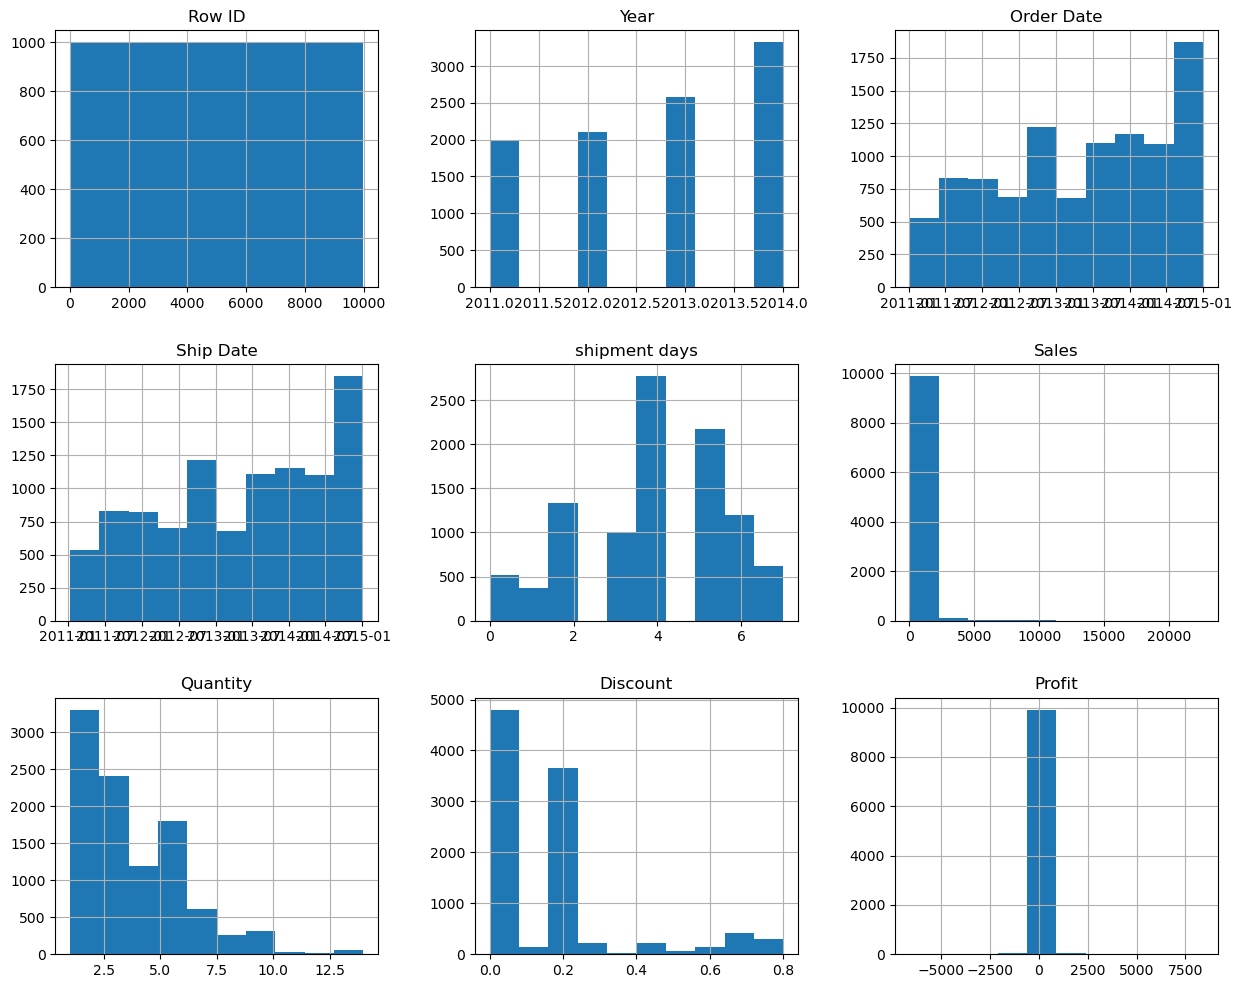

In [9]:
retail_sales.hist(figsize=(15,12))

In [10]:
# Product Category Distribution
retail_sales['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

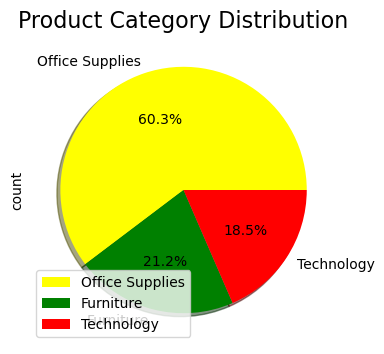

In [11]:
plt.figure(figsize=(8,4))
colors = ['Yellow','Green','red']

retail_sales['Category'].value_counts().plot(kind = 'pie', shadow =True, colors=colors,autopct='%0.1f%%',legend=type)
plt.title ('Product Category Distribution', fontsize=16)
plt.show()

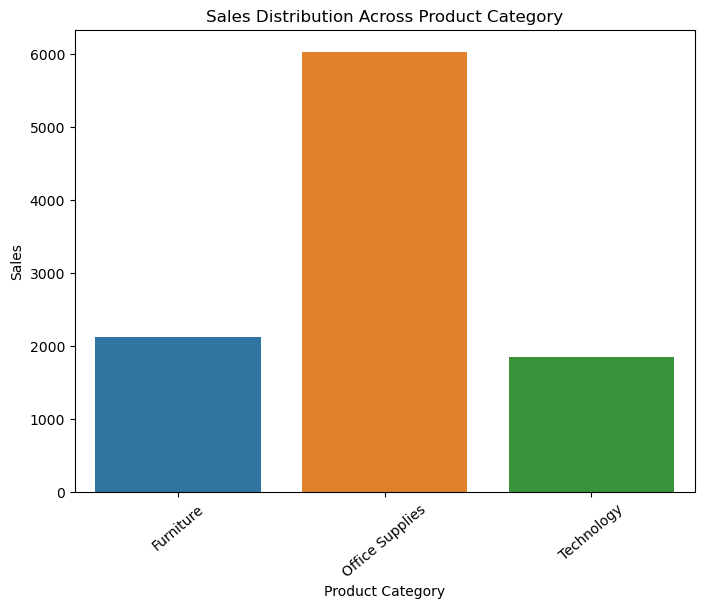

In [12]:
#What is the sales distribution across Product Category
plt.figure(figsize=(8,6))
colors = ['Green','Yellow','red']
sns.countplot(data=retail_sales, x='Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Sales Distribution Across Product Category')
plt.xticks(rotation=40)
plt.show()


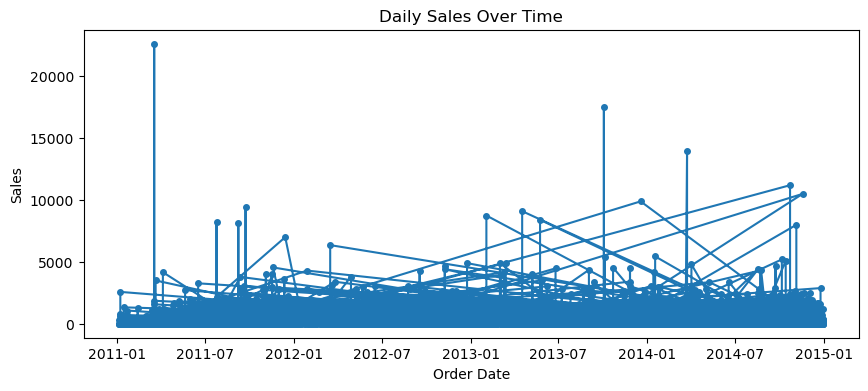

In [13]:
# Plotting daily sales
plt.figure(figsize=(10, 4))
plt.plot(retail_sales['Order Date'], retail_sales['Sales'], marker='o', markersize=4)
plt.title('Daily Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [14]:
#Aggregating sales data on a monthly basis
monthly_sales = retail_sales.resample('M', on='Order Date')['Sales'].sum().reset_index()

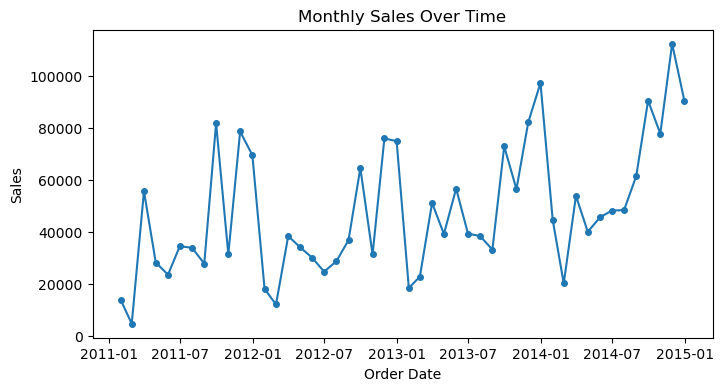

In [15]:
# Plotting monthly sales
plt.figure(figsize=(8,4))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', markersize=4)
plt.title('Monthly Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [16]:
# Displaying the first few rows of the monthly aggregated data
monthly_sales.head()

,Order Date,Sales
0,2011-01-31,13946.229
1,2011-02-28,4810.558
2,2011-03-31,55691.009
3,2011-04-30,28295.345
4,2011-05-31,23648.287


In [17]:
#What is the average total amount spent yearly.
average_spent = retail_sales.groupby('Year')['Sales'].mean()
average_spent

Year
2011    242.974159
2012    223.849909
2013    235.842570
2014    221.134987
Name: Sales, dtype: float64

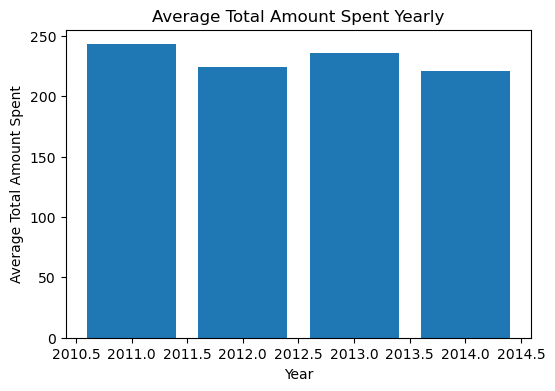

In [18]:
# Plotting average total amount spent yearly.
average_spent = retail_sales.groupby('Year')['Sales'].mean()
plt.figure(figsize=(6,4))

plt.bar(average_spent.index, average_spent.values)
plt.xlabel('Year')
plt.ylabel('Average Total Amount Spent')
plt.title('Average Total Amount Spent Yearly')
plt.show()

In [19]:
#sales distribution across all state 
retail_sales.State.value_counts()

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

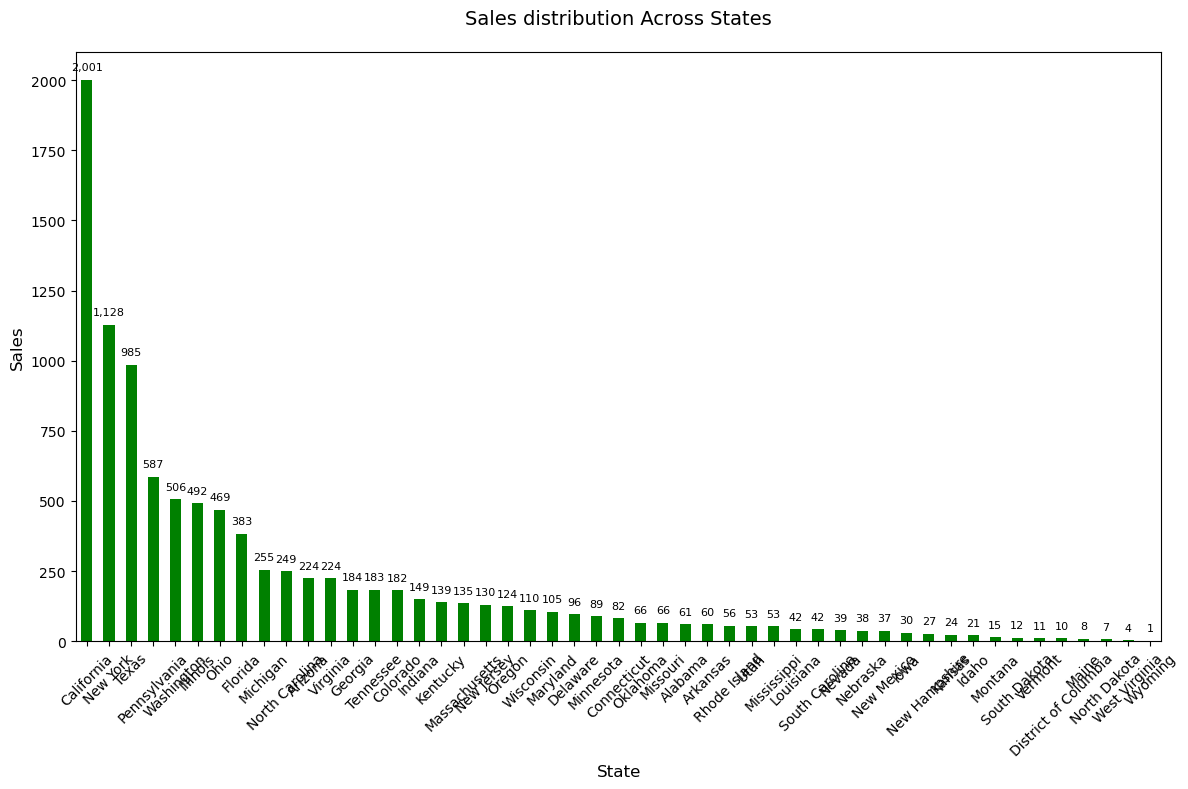

In [20]:
# Plotting sales distribution across all state
plt.figure(figsize=(12, 8)) 
x = retail_sales['State'].value_counts().plot(kind='bar', color='green')  

for i in x.patches:
    x.annotate(format(i.get_height(), ','),
               (i.get_x() + i.get_width() / 2., i.get_height()),
               ha='center', va='center',
               xytext=(0, 9), 
               textcoords='offset points',
               fontsize=8) 
x.tick_params(axis='x', rotation=45)  
x.tick_params(axis='y', labelsize=10)
plt.xlabel('State', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Sales distribution Across States', fontsize=14, pad=20)
plt.tight_layout() 
plt.show()

# Sorting Dataset by 'Order Date'

In [21]:
# Sorting dataset by 'Order Date'
retail_sales_sorted = retail_sales.sort_values(by='Order Date')

In [22]:
# Check for missing values
missing_values = retail_sales_sorted.isnull().sum()

In [23]:
#Extracting Year and Month from 'Order Date' for potential use
retail_sales_sorted['Year'] = retail_sales_sorted['Order Date'].dt.year
retail_sales_sorted['Month'] = retail_sales_sorted['Order Date'].dt.month

In [24]:
missing_values, retail_sales_sorted.head()

(Row ID           0
 Order ID         0
 Year             0
 Order Date       0
 Ship Date        0
 shipment days    0
 Ship Mode        0
 Customer ID      0
 Customer Name    0
 Segment          0
 Country          0
 City             0
 State            0
 Category         0
 Sub-Category     0
 Sales            0
 Quantity         0
 Discount         0
 Profit           0
 dtype: int64,
       Row ID        Order ID  Year Order Date  Ship Date  shipment days  \
 7980    7981  CA-2011-103800  2011 2011-01-04 2011-01-08              4   
 739      740  CA-2011-112326  2011 2011-01-05 2011-01-09              4   
 740      741  CA-2011-112326  2011 2011-01-05 2011-01-09              4   
 741      742  CA-2011-112326  2011 2011-01-05 2011-01-09              4   
 1759    1760  CA-2011-141817  2011 2011-01-06 2011-01-13              7   
 
            Ship Mode Customer ID  Customer Name      Segment        Country  \
 7980  Standard Class    DP-13000  Darren Powers     Consumer  Unit

In [25]:
# Aggregating sales data by 'Order Date'
sales_time_series = retail_sales_sorted.groupby('Order Date')['Sales'].sum()

In [26]:
# Resampling the data to daily frequency, filling missing days with 0 sales (assuming no sales occurred on those days)
sales_daily = sales_time_series.resample('D').sum()

In [27]:
# Checking the first few entries of the time series
sales_daily.head()

Order Date
2011-01-04      16.448
2011-01-05     288.060
2011-01-06      19.536
2011-01-07    4407.100
2011-01-08      87.158
Freq: D, Name: Sales, dtype: float64

Text(0, 0.5, 'Sales')

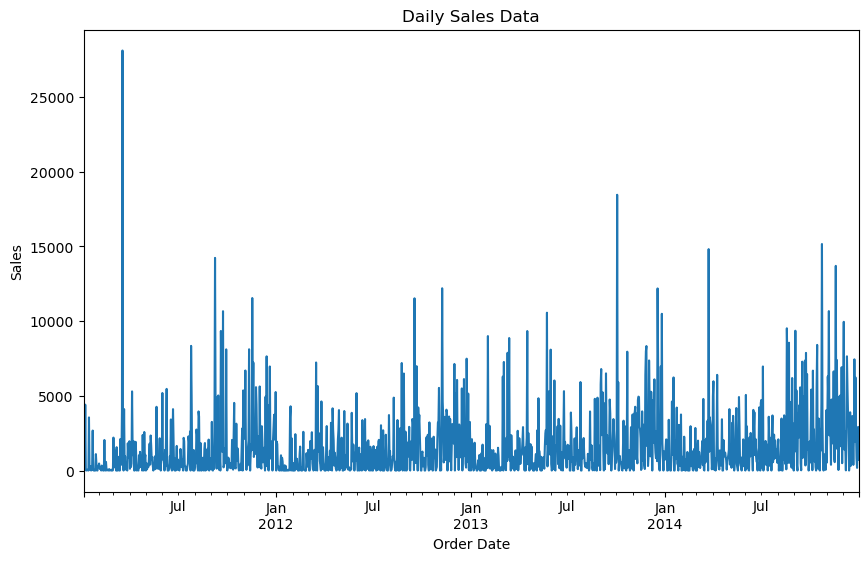

In [28]:
# Plotting the time series data
plt.figure(figsize=(10, 6))
sales_daily.plot(title='Daily Sales Data')
plt.xlabel('Order Date')
plt.ylabel('Sales')

# Check for Stationarity

In [29]:
# Perform the Augmented Dickey-Fuller test to check for stationarity
adf_result = adfuller(sales_daily)

In [30]:
# Extracting the p-value from the test results
p_value = adf_result[1]

In [31]:
# Interpreting the test results based on the p-value
if p_value < 0.05:
    stationary = True
else:
    stationary = False

p_value, stationary

(2.9208895910886974e-05, True)

# Performing Time series decomposition

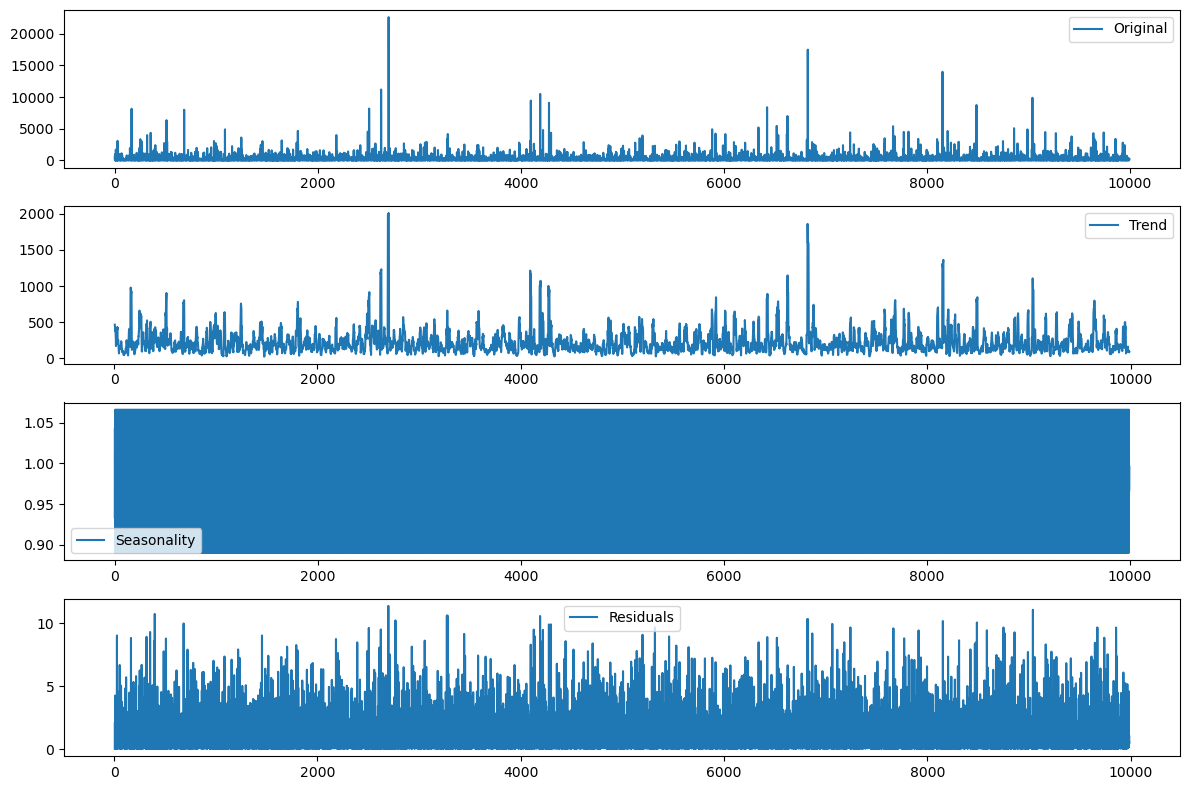

In [32]:
# Performing time series decomposition to identify trend, seasonality, and residuals
decomposition = seasonal_decompose(retail_sales['Sales'], model='multiplicative', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(retail_sales['Sales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Lag Features and Rolling Averages for Sales

In [33]:
#Creating a lag features for 'Sales' using 1-month lag 
retail_sales_sorted['Sales_lag_1'] = retail_sales_sorted.groupby(['Year', 'Month'])['Sales'].shift(1)

In [34]:
# Creating a rolling average feature using 3-month rolling average of 'Sales'
retail_sales_sorted['Sales_rolling_mean_3'] = retail_sales_sorted.groupby(['Year', 'Month'])['Sales'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

In [35]:
# Dropping NaN values that were created due to lagging and rolling
retail_sales_cleaned = retail_sales_sorted.dropna()

In [36]:
# Display the first few rows to verify the new features
retail_sales_cleaned[['Order Date', 'Year', 'Month', 'Sales', 'Sales_lag_1', 'Sales_rolling_mean_3']].head()

,Order Date,Year,Month,Sales,Sales_lag_1,Sales_rolling_mean_3
739,2011-01-05,2011,1,11.784,16.448,14.116000
740,2011-01-05,2011,1,272.736,11.784,100.322667
741,2011-01-05,2011,1,3.540,272.736,96.020000
1759,2011-01-06,2011,1,19.536,3.540,98.604000
7476,2011-01-07,2011,1,5.480,19.536,9.518667


# Splitting the data into training and testing sets

In [37]:
# Selecting a subset of features for simplicity
features = ['Year', 'Month', 'Sales_lag_1', 'Sales_rolling_mean_3']
X = retail_sales_cleaned[features]
y = retail_sales_cleaned['Sales']

In [38]:
# Split the data into training and testing sets
# Using the last 20% of the data as test set to respect the temporal order
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [39]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7956, 4)
X_test shape: (1990, 4)
y_train shape: (7956,)
y_test shape: (1990,)


# Evaluate different forecasting models

# Mode1 - ARIMA

In [40]:
# Define the train and test sets from the daily sales data
train_size = int(len(sales_daily) * 0.8)
train, test = sales_daily[0:train_size], sales_daily[train_size:]

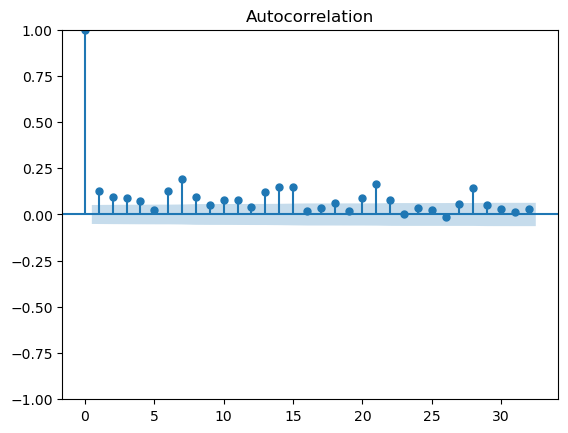

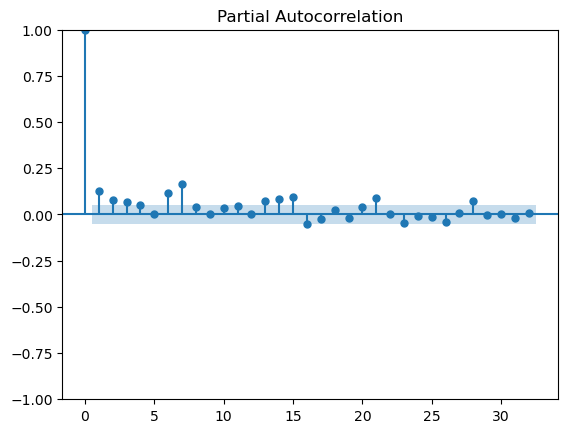

In [41]:
# Plotting Autocorrelation Function (ACF) Plot
plot_acf(sales_daily)

# Plotting Partial Autocorrelation Function (PACF) Plot
plot_pacf(sales_daily)

plt.show()

In [42]:
# Fit the ARIMA model on the training set
model_arima_train = ARIMA(train, order=(1, 0, 1))
model_arima_train_fit = model_arima_train.fit()

In [43]:
# Summary of the model
model_summary =  model_arima_train_fit.summary()

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 1166
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10556.224
Date:                Sun, 28 Apr 2024   AIC                          21120.448
Time:                        22:28:23   BIC                          21140.694
Sample:                    01-04-2011   HQIC                         21128.085
                         - 03-14-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1409.9882    220.635      6.391      0.000     977.552    1842.424
ar.L1          0.9572      0.018     54.526      0.000       0.923       0.992
ma.L1         -0.8972      0.028    -32.005      0.000      -0.952      -0.842
sigma2      4.368e+06   6.86e+04     63.683      0.000    4.23e+06     4.5e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):             54738.86
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             4.04
Prob(H) (two-sided):                  0.32   Kurtosis:                        35.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
# Check the residuals
residuals = model_arima_train_fit.resid

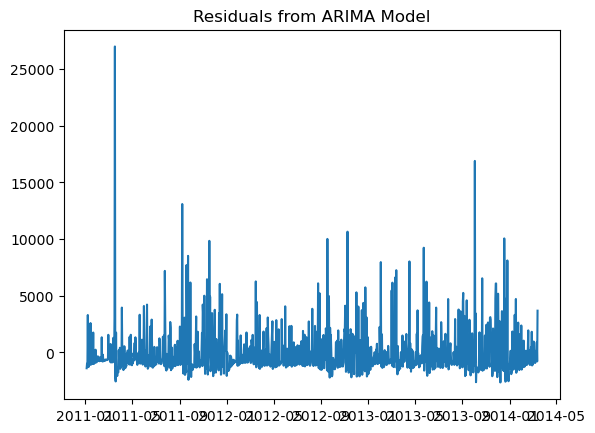

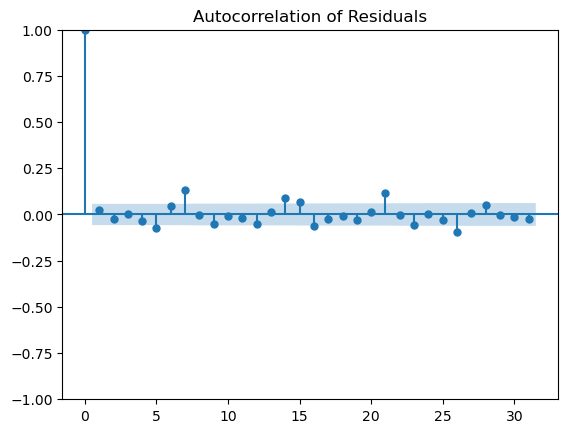

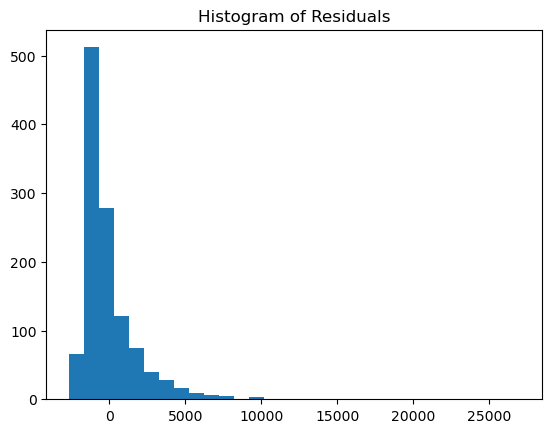

In [45]:
# Plotting residuals
plt.figure()
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.show()

# Plotting ACF of residuals
plot_acf(residuals)  
plt.title('Autocorrelation of Residuals')
plt.show()

# Plotting histogram of residuals
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.show()

In [46]:
# Forecast for the length of the test set
forecast = model_arima_train_fit.forecast(steps=len(test))

In [47]:
# Calculate the RMSE for the ARIMA model
rmse_arima = np.sqrt(mean_squared_error(test, forecast))

In [48]:
print("RMSE Arima Model:", rmse_arima)

RMSE Arima Model: 2653.1993184636563


In [49]:
# Calculate MAE for the ARIMA model
mae_arima = mean_absolute_error(test, forecast)

In [50]:
print("MAE Arima Model:", mae_arima)

MAE Arima Model: 1720.7812643683628


In [51]:
# Fit the ARIMA(1,0,1) model
model_arima = ARIMA(sales_daily, order=(1, 0, 1))
model_arima_fit = model_arima.fit()

In [52]:
# Forecasting the next 5 days future values 
forecast_period = 5
forecast = model_arima_fit.forecast(steps=forecast_period)


In [53]:
print(forecast)

2015-01-01    2258.919144
2015-01-02    2244.028128
2015-01-03    2229.461588
2015-01-04    2215.212453
2015-01-05    2201.273806
Freq: D, Name: predicted_mean, dtype: float64


In [54]:
# Assuming 'forecast' contains the forecasted values and has a datetime index
forecasted_sales = forecast

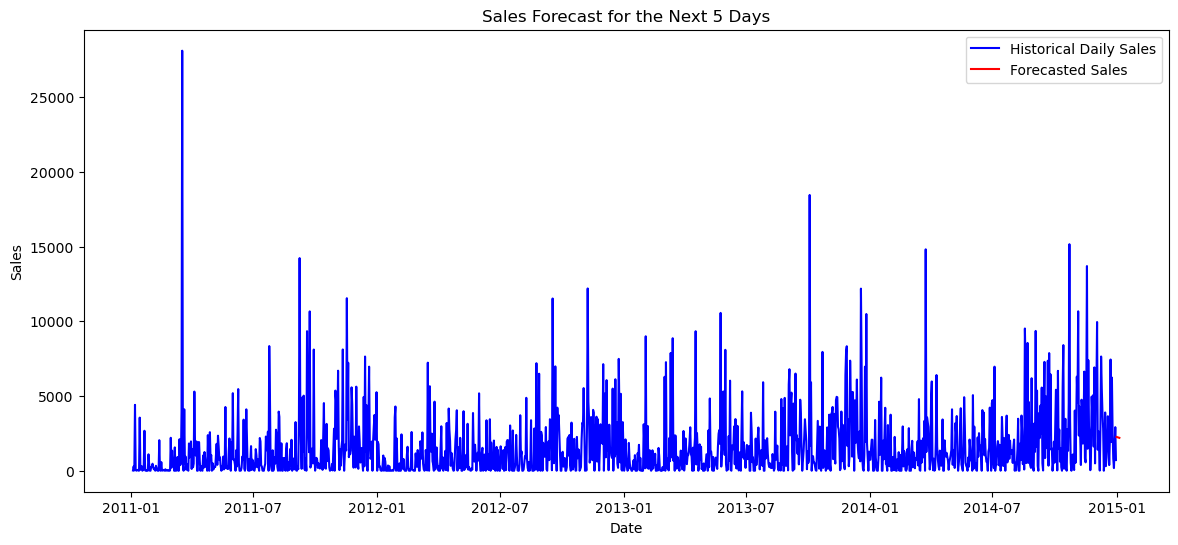

In [55]:
# Plotting the forecast along with the historical data
plt.figure(figsize=(14, 6))

# Plot actual sales
plt.plot(sales_daily.index, sales_daily,  label='Historical Daily Sales', color='blue')


# Plot forecasted sales
plt.plot(forecasted_sales.index, forecasted_sales, label='Forecasted Sales', color='red')

plt.title('Sales Forecast for the Next 5 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Model 2 - Linear Regression

In [56]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Predict on the testing set
y_pred = lr_model.predict(X_test)

In [58]:
# Calculate RMSE for the predictions
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))

In [59]:
print("RMSE for Linear Regression:", rmse_lr)

RMSE for Linear Regression: 411.42153820158387


In [60]:
# Calculate MAE for the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred)

In [61]:
print("MAE for Linear Regression Model:", mae_lr)

MAE for Linear Regression Model: 168.15455143895548


In [62]:
cv_folds = 5  # Number of cross-validation folds

In [63]:
# Perform cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X, y, cv=cv_folds, scoring='r2')
cv_mean_r2_lr = np.mean(cv_scores_lr)

In [64]:
print("Average R² for Linear Regression across 5 folds:", cv_mean_r2_lr)

Average R² for Linear Regression across 5 folds: 0.5048002343060938


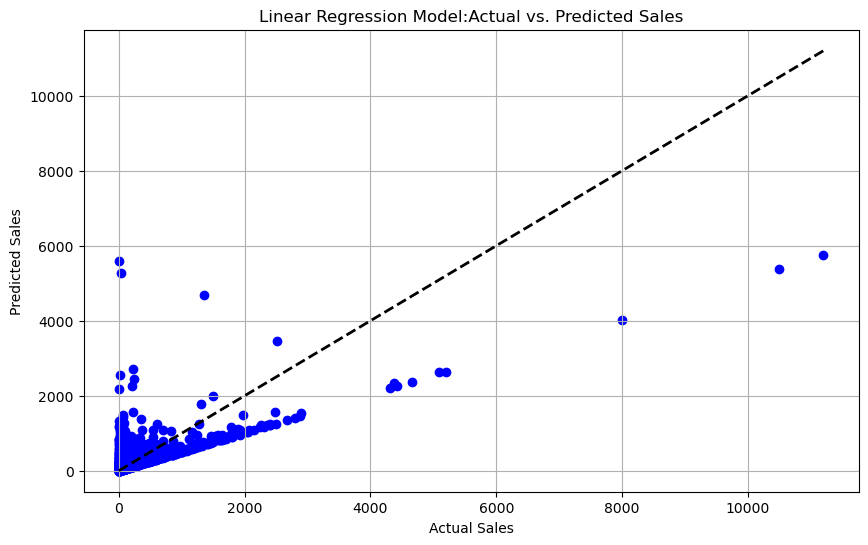

In [65]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line for perfect predictions
plt.title('Linear Regression Model:Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

# Model 3 - Random Forest Regressor 

In [66]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [67]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)

In [69]:
# Calculate RMSE for the Random Forest predictions
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [70]:
print("RMSE for Random Forest Model:", rmse_rf)

RMSE for Random Forest Model: 398.6075478103146


In [71]:
# Calculate MAE for the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [72]:
print("MAE for Random Forest Model:", mae_rf)

MAE for Random Forest Model: 169.7634863110553


In [73]:
cv_folds = 5  # Number of folds

In [74]:
# Perform cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=cv_folds, scoring='r2')
cv_mean_r2_rf = np.mean(cv_scores_rf)

In [75]:
print("Average R² for Random Forest across 5 folds:", cv_mean_r2_rf)

Average R² for Random Forest across 5 folds: 0.497816831747525


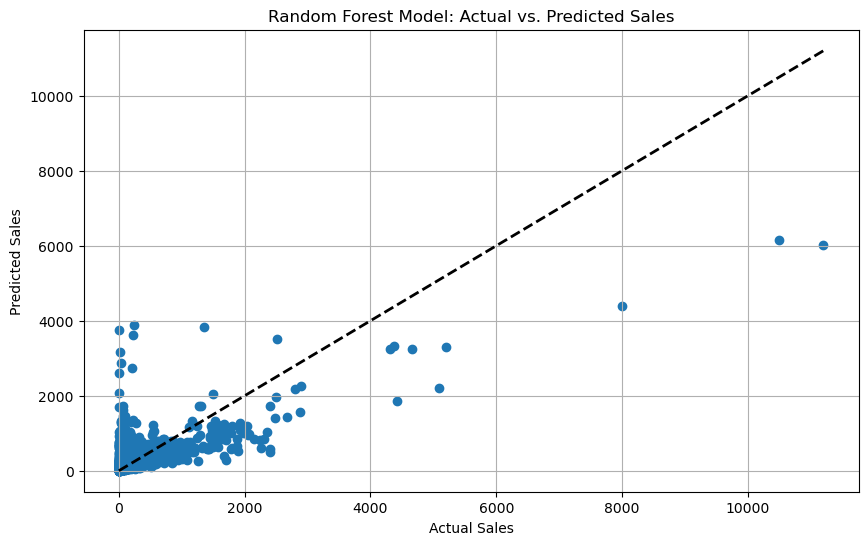

In [76]:
# Plotting a scatter graph for the Random Forest model predictions vs. actual sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line for perfect predictions
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest Model: Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

# Model Perfomance Comparison

In [77]:
# Data preparation for plotting
model_names = ['Arima','Linear Regression', 'Random Forest']
rmse_values = [2653.19,411.42, 398.60]
mae_values = [1720.78,168.15, 169.76]

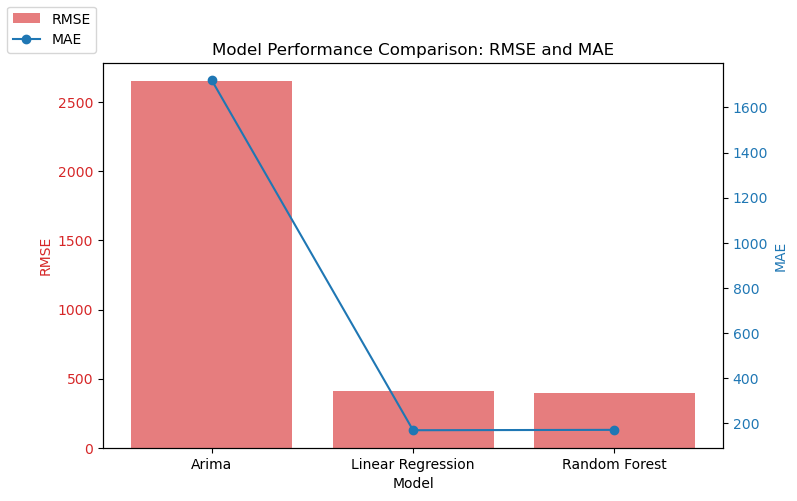

In [78]:
# Plotting Model Performance Comparison
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:red'
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE', color=color)
ax1.bar(model_names, rmse_values, color=color, alpha=0.6, label='RMSE')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('MAE', color=color) 
ax2.plot(model_names, mae_values, color=color, marker='o', label='MAE')
ax2.tick_params(axis='y', labelcolor=color)


fig.legend(loc="upper left")
plt.title('Model Performance Comparison: RMSE and MAE')
plt.show()

# Key Observations:
Both the Linear Regression and Random Forest models exhibit significantly lower RMSE and MAE values compared to the ARIMA model, suggesting they are more accurate in predicting retail sales for this dataset.
The Random Forest model has a slightly lower RMSE than the Linear Regression model, indicating it might be the best performer among the three models in terms of prediction accuracy.
The ARIMA model's performance is notably worse than the other two models, as indicated by its much higher RMSE and MAE values. This suggests it may not be as suitable for this specific forecasting task, given the data and the approach used.
This comparison highlights the importance of evaluating multiple models and metrics to select the most appropriate forecasting approach for a given dataset and business objective